Bagging与随机森林
===
[参考一下](https://zhuanlan.zhihu.com/p/41809927)

# 1.组合算法概述

## 1.1.弱分类器和强分类器
最好的分类器是支持向量机,通常正确率为50%左右的是比较弱的分类器，而正确率在80%或者90%以上的就是比较好的分类器。我们可以联合使用多个弱分类器，来形成一个强的分类器

## 1.2.分类器的组合算法
- 装袋(bagging)-随机森林
- 提升(boosting)-GBT、Adaboost、XGBoost
- Stacking

我们可以用多个弱分类器，然后通过这三种不同的框架来实现一个强的分类器

# 2.Bagging

## 2.1.Bagging概述
bagging能提升机器学习算法的稳定性和准确性，它可以减少模型的方差从而避免overfitting。它通常应用在决策树方法中，其实它可以应用到任何其它机器学习算法中

## 2.2.Bagging的过程-自助式抽样
我们需要构造多个弱分类器，但是又不能多次重复使用同一份数据(因为这样做只会得到同一个结果)，所以就需要构造不同的数据。用来构造不同的数据集的方法，就是自助式抽样。从总体m条记录中，有放回的抽出m个样本，组成的就是自助式抽样，由于是有放回的，所以抽出的m条记录是可能有重复记录的，所以两个m是不一样的。再一次抽样过程中，某一个样本被抽中的概率是$\frac{1}{m}$，那么它不被抽中的概率就是$1-\frac{1}{m}$，那么在一轮自助式抽样过程中，这个样本都没有被抽中的概率是$p=(1-\frac{1}{m})^m$，那么我们极限$\lim\limits_{m\to\infty}p=\lim\limits_{m\to\infty}(1-\frac{1}{m})^m=e^{-1}\approx0.368$，所以用自助式抽样所抽出的样本，能够覆盖总体样本的概率是$1-0.368=0.632=63.2$%。也就是说63.2%的数据用于生成分类器，剩下的36.8%就可以用来做测试数据。bagging的一种常见方法是我们训练好多模型：SVM, 决策树，DNN 等，然后将最后再用一个lr做组合

## 2.3.Bagging的过程-算法过程
![images](images/05_001.png)

每个子训练集都是经过有放回的自助性抽样过程选出的训练集
Bagging(Bootstrap aggregating的缩写)算法是最早的集成学习算法，具体步骤可以描述为：
- 利用Bootstrap方法重采样(自助式抽样)，随机产生T个训练集$S_1,S_2,...,S_T$;
- 利用每个训练集，生成对应的分类器$C_1,C_2,...,C_T$，可以是SVM，决策树，逻辑回归，一般用决策树；
- 对于测试数据集样本X，利用每个决策树进行测试，得到对应的类别$C_1(X),C_2(X),...,C_T(X)$；
- 采用投票的方法，将T个决策树中输出最多的类别作为测试集样本X所属的类别

## 2.4.举例
假设有一个训练集D的大小为7，我想用bagging生成3个新的训练集$D_i$,每个$D_i$的大小为7，结果如下表

![images](images/05_002.png)

那么现在我就可以用上面生成的3个新训练集来拟合模型了。

# 3.随机森林

## 3.1.概述
随机森林和Bagging算法唯一的区别是：**随机森林在生成决策树的时候用随机选择的特征，在Bagging算法中，选择训练样本是通过重采样的方法随机选取的，但是对于每条数据，Bagging算法会选择完整特征；但是随机森林不会选择完整特征，它会随机选择部分特征**。之所以这么做的原因是，如果训练集中的几个特征对输出的结果有很强的预测性，那么这些特征会被每个决策树所应用，这样会导致树之间具有相关性，这样并不会减小模型的方差。在自助式抽样的基础上，随机抽取几个属性来构成数据，相当于数据和属性都是随机的.本身来说，决策树是弱分类器，只不过在数据随机或者属性随机的情况下，决策树就变成了弱分类器，通过若干个弱分类器的组合，我们就形成了一个可以跟支持向量机相媲美的强分类器，所以，随机森林包含四个步骤：随机选择样本、随机选择特征、构建决策树、随机森林投票分类

## 3.2.随机选择样本
给定一个训练样本集，数量为N，我们使用**有放回采样**到N个样本，构成一个新的训练集。注意这里是有放回的采样，所以会采样到重复的样本。详细来说，就是采样N次，每次采样一个，放回，继续采样。即得到了N个样本。然后我们把这个样本集作为训练集，进入下面的一步

## 3.3.随机选择特征
在构建决策树的时候，在一个节点上计算所有特征的Information Gain(ID3)或者Gain Ratio(C4.5)，然后选择一个最大增益的特征作为划分下一个子节点的走向。但是，在随机森林中，我们不计算所有特征的增益，而是从总量为M的特征向量中，随机选择m个特征，其中m可以等于$\sqrt{M}$，然后计算m个特征的增益，选择最优特征（属性）。注意，这里的**随机选择特征是无放回的选择**！

## 3.4.构建决策树
有了上面随机产生的样本集，我们就可以使用一般决策树的构建方法，得到一棵分类（或者预测）的决策树。需要注意的是，在计算节点最优分类特征的时候，我们要使用上面的随机选择特征方法。而选择特征的标准可以是我们常见的Information Gain(ID3)或者 Gain Ratio(C4.5)

## 3.5.随机森林投票分类
通过上面的三步走，我们可以得到一棵决策树，我们可以重复这样的过程H次，就得到了H棵决策树。然后来了一个测试样本，我们就可以用每一棵决策树都对它分类一遍，得到了H个分类结果。这时，我们可以使用简单的投票机制，或者该测试样本的最终分类结果

## 3.6.优缺点
- 优点：它能够处理很高维度（feature很多）的数据，并且不用做特征选择；由于随机选择样本导致的每次学习决策树使用不同训练集，所以可以一定程度上避免过拟合；
- 缺点：随机森林已经被证明在某些噪音较大的分类或回归问题上会过拟合；对于有不同级别的属性的数据，级别划分较多的属性会对随机森林产生更大的影响，所以随机森林在这种数据上产出的属性权值是不可信的。

# 4.总结
决策树是一个很流行的机器学习算法。这个算法的性能在特征值的缩放和各种转换的情况下依然保持不变，即使在包含不相关特征的前提下，它依然很健壮。然而，决策树很容易过拟合训练集。它有低的偏差，但是有很高的方差，因此它的准确性不怎么好。bagging是早期的集成方法(ensemble method)，它可以重复地构建多个决策树基于有放回地重新采样，然后集成这些决策树模型进行投票，从而得到更好地准确性。

## 4.1.正确采样率
下面的程序模拟了采样次数以及正确采样率

9 次采样正确率： 0.6214209454492188
109 次采样正确率： 0.8529248106496278
209 次采样正确率： 0.9266174850684462


309 次采样正确率： 0.9611075441817517


409 次采样正确率： 0.9787555232982922


509 次采样正确率： 0.9881786394306903


609 次采样正确率： 0.9933384209653018


709 次采样正确率： 0.9962112837399784


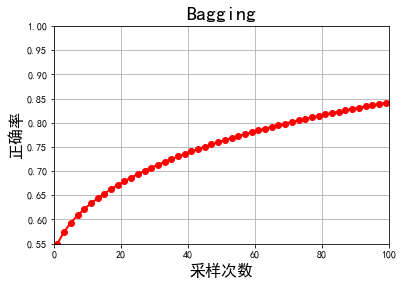

In [1]:
import operator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from functools import reduce
%matplotlib inline

def c(n, k):
    len1 = n - k + 1
    len2 = n + 1
    len3 = k + 1
    c1 = reduce(operator.mul, range(len1, len2))
    c2 = reduce(operator.mul, range(1, len3))
    return  c1 / c2;

def bagging(n, p):
    s = 0
    for i in range(int(n / 2 + 1), int(n + 1)):
        s += c(n, i) * p ** i * (1 - p) ** (n - i)
    return s

n = 800
x = np.arange(1, n, 2)
y = np.empty_like(x, dtype=np.float)
for i, t in enumerate(x):
    y[i] = bagging(t, 0.55)
    if t % 100 == 9:
        print(t, '次采样正确率：', y[i])
mpl.rcParams[u'font.sans-serif'] = u'SimHei'
mpl.rcParams[u'axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(x, y, 'ro-', lw=2)
plt.xlim(0,100)
plt.ylim(0.55, 1)
plt.xlabel(u'采样次数', fontsize=16)
plt.ylabel(u'正确率', fontsize=16)
plt.title(u'Bagging', fontsize=20)
plt.grid(b=True)

# 5.使用随机森林算法对鸢尾花数据进行分类

{'max_depth': 3, 'n_estimators': 100}
{'max_depth': 6, 'n_estimators': 300}
{'max_depth': 2, 'n_estimators': 100}
{'max_depth': 5, 'n_estimators': 10}
{'max_depth': 5, 'n_estimators': 1}
{'max_depth': 2, 'n_estimators': 10}


Text(0.5, 0.98, '随机森林对鸢尾花数据的两特征组合的分类结果')

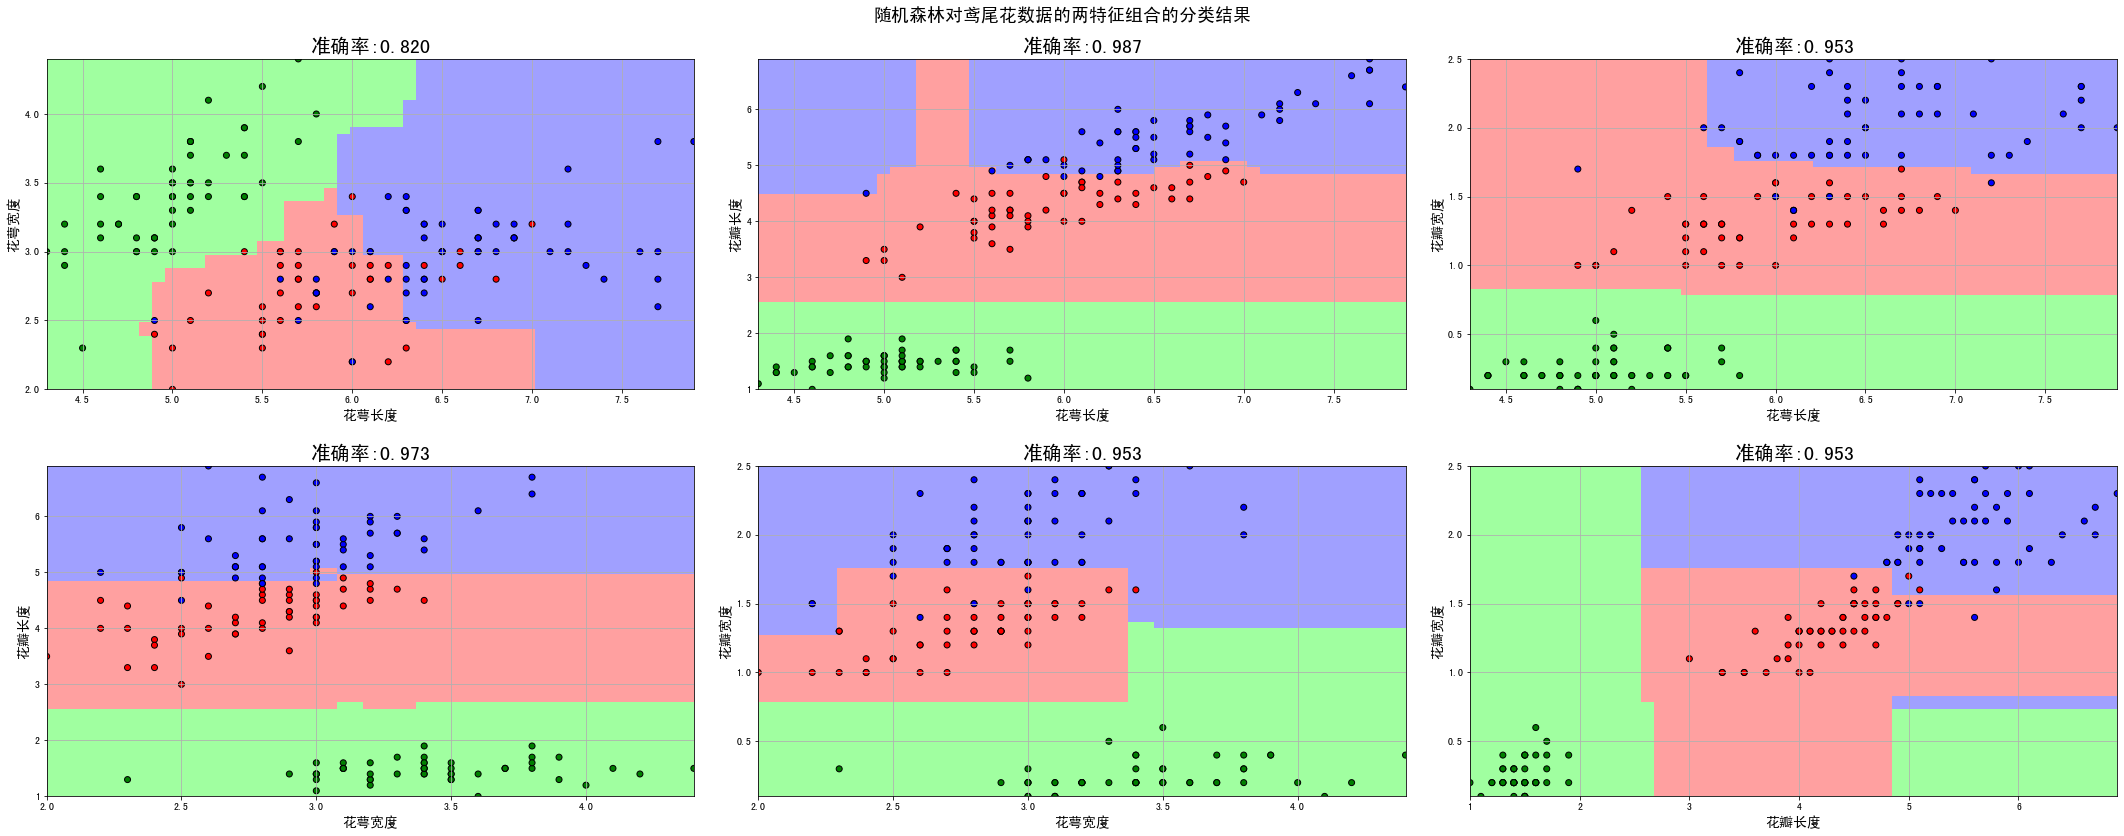

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
import os

data_path = os.path.join("data")


def iris_type(s):
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]


iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'

mpl.rcParams['font.sans-serif'] = [u'SimHei']  # 黑体 FangSong/KaiTi
mpl.rcParams['axes.unicode_minus'] = False

data = pd.read_csv(os.path.join(data_path, "iris.data"), header=None)
x_prime = data[np.arange(4)]
y = pd.Categorical(data[4]).codes

feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
plt.figure(figsize=(30, 12), facecolor='w')

max_depth = np.arange(1, 10)
n_estimators = [1, 10, 100, 200, 300]
params_list = dict(max_depth = max_depth, n_estimators = n_estimators)
cv = StratifiedKFold(4)
cv.get_n_splits(x_prime, y)
for i, pair in enumerate(feature_pairs):
    # 准备数据
    x = x_prime[pair]

    # 随机森林
    clf = GridSearchCV(RandomForestClassifier(criterion='entropy'), param_grid=params_list, cv=cv)
    clf.fit(x, y.ravel())

    # 画图
    N, M = 50, 50  # 横纵各采样多少个值
    x1_min, x2_min = x.min()
    x1_max, x2_max = x.max()
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
    x_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

    # 训练集上的预测结果
    y_hat = clf.predict(x)
    print(clf.best_params_)
    y = y.reshape(-1)
    c = np.count_nonzero(y_hat == y)    # 统计预测正确的个数

    # 显示
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = clf.predict(x_test)  # 预测值
    y_hat = y_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.subplot(2, 3, i+1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
    plt.scatter(x[pair[0]], x[pair[1]], c=y, edgecolors='k', cmap=cm_dark)  # 样本
    plt.xlabel(iris_feature[pair[0]], fontsize=14)
    plt.ylabel(iris_feature[pair[1]], fontsize=14)
    plt.title('准确率:%.3f' % clf.score(x, y),fontsize=20)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid()
plt.tight_layout(2.5)
plt.subplots_adjust(top=0.92)
plt.suptitle(u'随机森林对鸢尾花数据的两特征组合的分类结果', fontsize=18)

# 6.使用随机森林进行回归预测

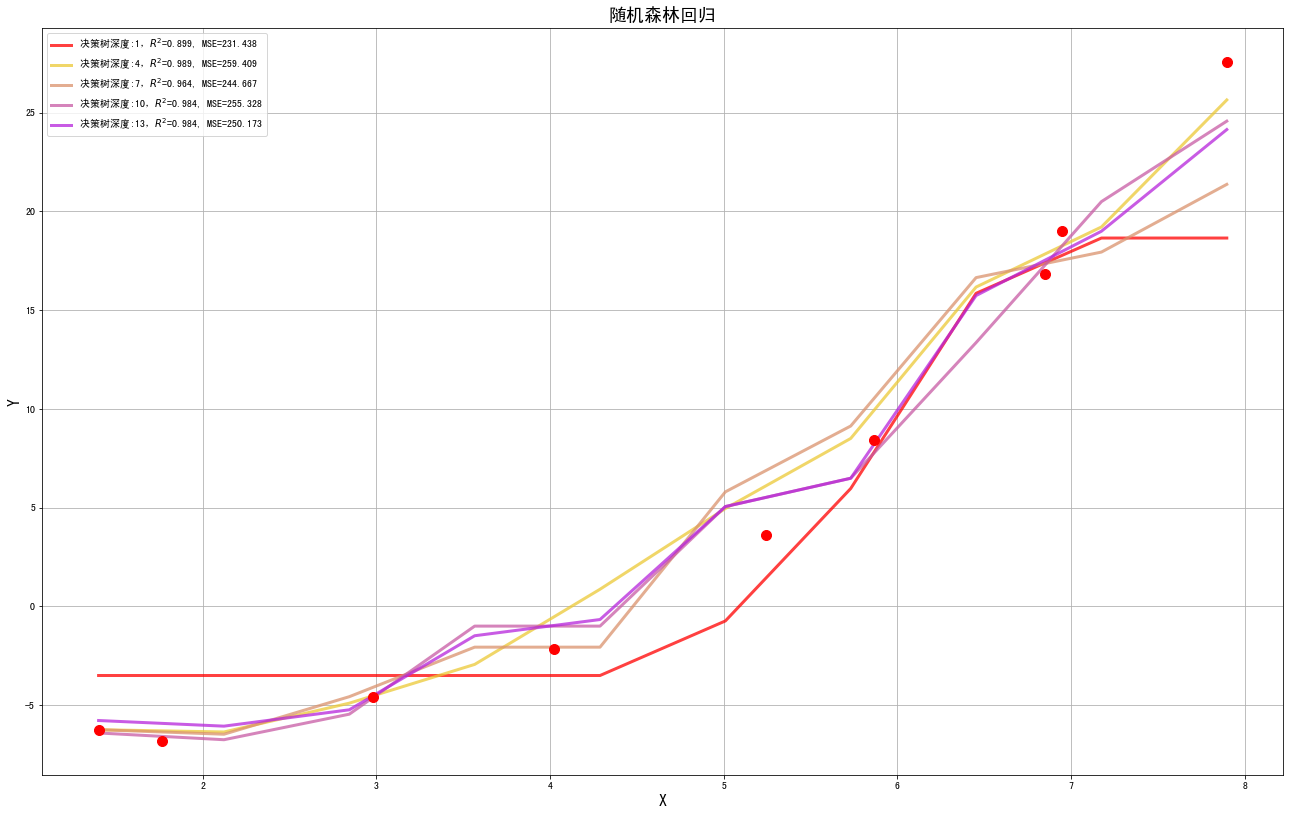

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import matplotlib as mpl

np.random.seed(0)
np.set_printoptions(linewidth=1000)
N = 9

x = np.asarray([1.40015721,1.76405235,2.97873798,4.02272212,5.2408932,5.86755799,6.84864279,6.95008842,7.89678115], dtype=np.float)
y = np.asarray([-6.22959012,-6.80028513,-4.58779845,-2.1475575,3.62506375,8.40186804,16.84301125,18.99745441,27.56686965])

x.shape = -1, 1
y.shape = -1, 1

mpl.rcParams['font.sans-serif'] = [u'SimHei']  # 黑体 FangSong/KaiTi
mpl.rcParams['axes.unicode_minus'] = False

deep_length = 15
model = RandomForestRegressor(n_estimators=10)
clrs = []  # 颜色
for c in np.linspace(16711680, 255, deep_length):
    clrs.append("#{:06X}".format(int(c), 2))
d_pool = np.arange(1, deep_length + 1, 3)  # 阶

label = '随机森林回归'

plt.figure(figsize=(18, 12), facecolor='w')
plt.plot(x, y, 'ro', ms=10, zorder=N)

for i, d in enumerate(d_pool):
    model.set_params(max_depth=d)
    model.fit(x, y.ravel())

    x_hat = np.linspace(x.min(), x.max(), num=10)
    x_hat.shape = -1, 1
    y_hat = model.predict(x_hat)
    s = model.score(x, y)
    mse = np.average((y_hat - np.array(y)) ** 2)# 误差平方和
    label1 = u'决策树深度:%d，$R^2$=%.3f, MSE=%.3f' % (d, s, mse)
    plt.plot(x_hat, y_hat, color=clrs[i], lw=3, alpha=0.75, label=label1)

plt.legend(loc='upper left')
plt.grid(True)
plt.title(label, fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)

plt.tight_layout(1, rect=(0, 0, 1, 0.95))

# 7.比较决策树、Bagging算法和随机森林

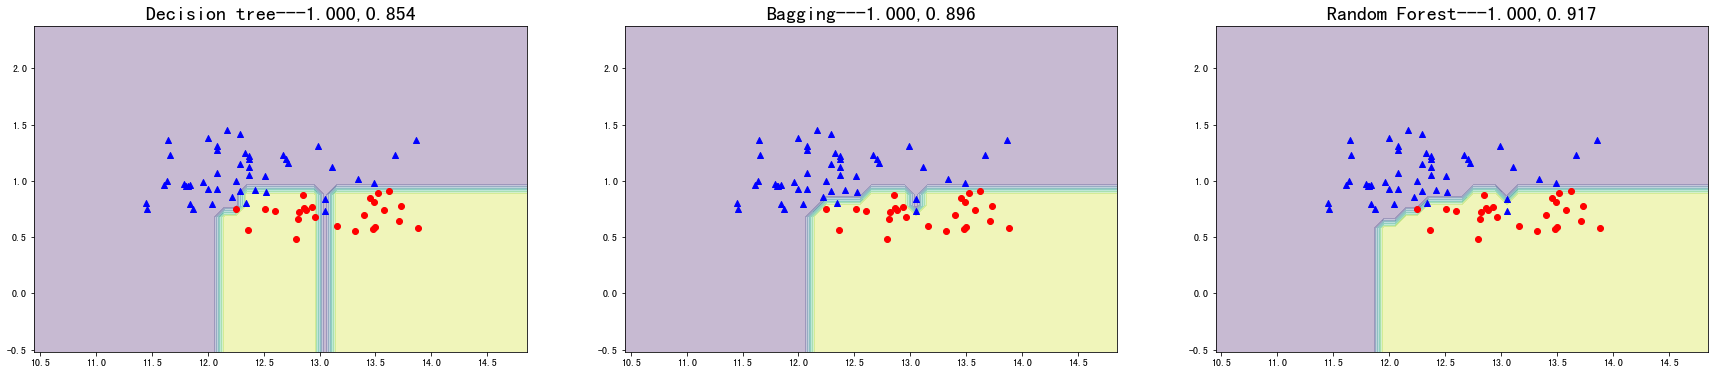

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import pyplot as plt
import os

data_path = os.path.join("data")
df_wine = pd.read_csv(os.path.join(data_path, "wine.data"), header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine = df_wine[df_wine['Class label'] != 1] # 数据集中有3个类别，这里我们只用其中的2个类别
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'Hue']].values # 为了可视化的目的，我们只选择2个特征

le = LabelEncoder()
y = le.fit_transform(y) # 把label转换为0和1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,  random_state=1) # 拆分训练集的40%作为测试集

tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)
# 生成500个决策树，详细的参数建议参考官方文档
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=1, random_state=1)

rf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_features='sqrt', max_depth=None, min_samples_split=2, bootstrap=True, n_jobs=1, random_state=1)

# 度量单个决策树的准确性
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

# 度量bagging分类器的准确性
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)

rf = rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rf_train = accuracy_score(y_train, y_train_pred)
rf_test = accuracy_score(y_test, y_test_pred)

x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.figure(figsize=(30,6), facecolor='w')
for idx, clf, tt, score in zip([0, 1, 2], [tree, bag, rf], ['Decision tree', 'Bagging', 'Random Forest'],
                               [[tree_train,tree_test],[bag_train,bag_test],[rf_train, rf_test]]):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 3, idx+1)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='blue', marker='^')
    plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='red', marker='o')
    plt.title('%s---%.3f,%.3f' % (tt, score[0], score[1]),fontsize=20)